In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
training_dir="train"
validation_dir="val"
test_dir="test"

In [3]:
training_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = training_data_generator.flow_from_directory(training_dir,target_size=(224,224),
                                                              class_mode="categorical",batch_size=16)
validation_generator = validation_data_generator.flow_from_directory(validation_dir,target_size=(224,224),
                                                              class_mode="categorical",batch_size=16)
test_generator=test_data_generator.flow_from_directory(test_dir,target_size=(224,224),
                                                              class_mode="categorical",batch_size=16)

Found 4014 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
Found 524 images belonging to 2 classes.


In [5]:
import keras 
from keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout

input_shape=(224,224,3)
def firenet(input_shape):
    model=keras.models.Sequential([layers.Conv2D(96,(11,11),strides=(4,4),activation="relu",input_shape=input_shape),
                                   layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                                   
                                   layers.Conv2D(256,(5,5),activation="relu"),
                                   layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),

                                   layers.Conv2D(512,(5,5),activation="relu"),
                                   layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),

                                   layers.Flatten(),
                                   layers.Dropout(0.3),

                                   layers.Dense(2048,activation="relu"),
                                   layers.Dropout(0.3),

                                   layers.Dense(1024,activation="relu"),
                                   layers.Dropout(0.3),

                                   layers.Dense(2,activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=1e-4),metrics=["acc"])
    return model


# Model oluşturma fonksiyonu
def create_model(input_shape,activation):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(64, kernel_size=3, activation=activation))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation=activation))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation=activation))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten())
    model.add(Dense(64, activation=activation))
    model.add(Dropout(0.45))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [6]:
model = create_model(input_shape,"relu")

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,050 (508.01 KB)

 Trainable params: 130,050 (508.01 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
# EarlyStopping callback'ini tanımlayın
early_stopping = EarlyStopping(monitor='val_accuracy',  # İzlenecek metrik
                               patience=10,              # İyileşme gözlemlenmezse kaç epoch sonra durdurulacak
                               restore_best_weights=True)  # En iyi ağırlıkları geri yükler


history=model.fit(train_generator,
                  epochs=100,validation_data=validation_generator,callbacks=[early_stopping]
)

Epoch 1/100
  1/251 ━━━━━━━━━━━━━━━━━━━━ 4:11 1s/step - accuracy: 0.1250 - loss: 0.7476

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.7795 - loss: 0.4765 - val_accuracy: 0.8923 - val_loss: 0.3093
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.8814 - loss: 0.3112 - val_accuracy: 0.9207 - val_loss: 0.2435
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9125 - loss: 0.2270 - val_accuracy: 0.9248 - val_loss: 0.2362
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9211 - loss: 0.2094 - val_accuracy: 0.9309 - val_loss: 0.2069
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 120ms/step - accuracy: 0.9280 - loss: 0.1836 - val_accuracy: 0.9187 - val_loss: 0.2355
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9450 - loss: 0.1489 - val_accuracy: 0.9350 - val_loss: 0.2185
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9489 - loss: 0.1430 - val_accuracy: 0.9329 - val_loss: 0.2426
Epoch 8/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9516 - loss: 0.1396 - val

In [10]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


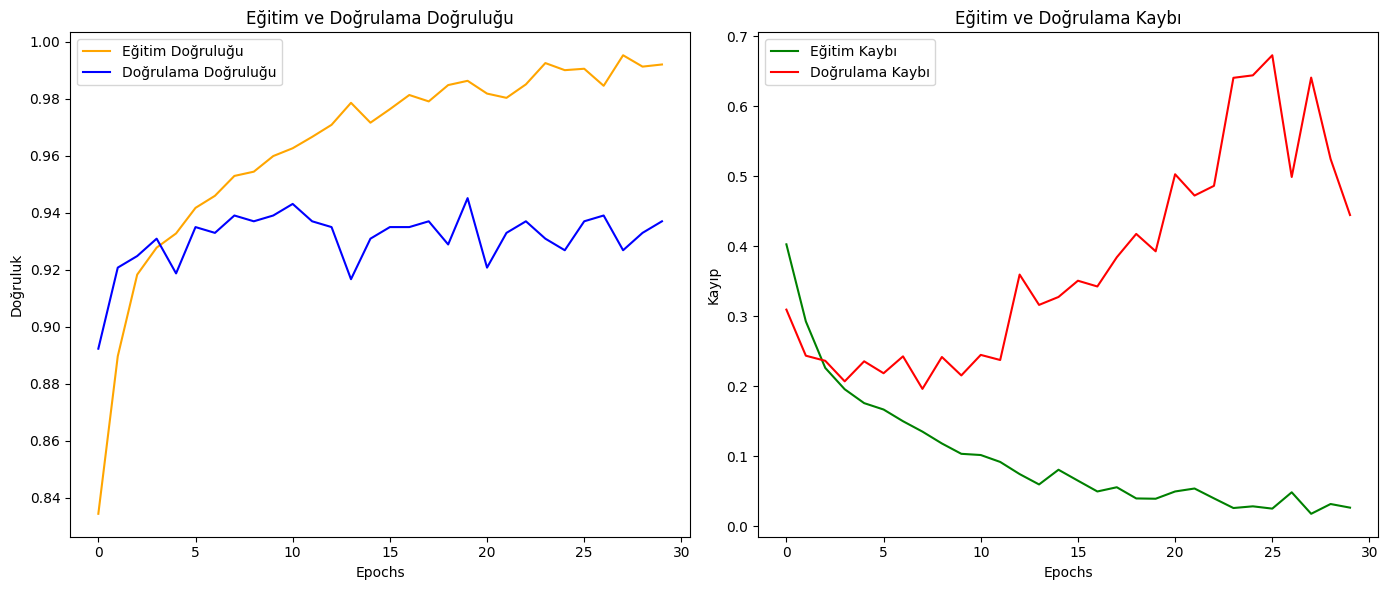

In [12]:
import matplotlib.pyplot as plt 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs=range(0,30)



plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Eğitim Doğruluğu', color='orange')
plt.plot(epochs, val_acc, label='Doğrulama Doğruluğu', color='blue')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Eğitim Kaybı', color='green')
plt.plot(epochs, val_loss, label='Doğrulama Kaybı', color='red')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
model.save("model_yangin.h5")

 7/33 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Confusion Matrix:
[[116 128]
 [128 152]]
Classification Report:
              precision    recall  f1-score   support

        fire       0.48      0.48      0.48       244
    non_fire       0.54      0.54      0.54       280

    accuracy                           0.51       524
   macro avg       0.51      0.51      0.51       524
weighted avg       0.51      0.51      0.51       524



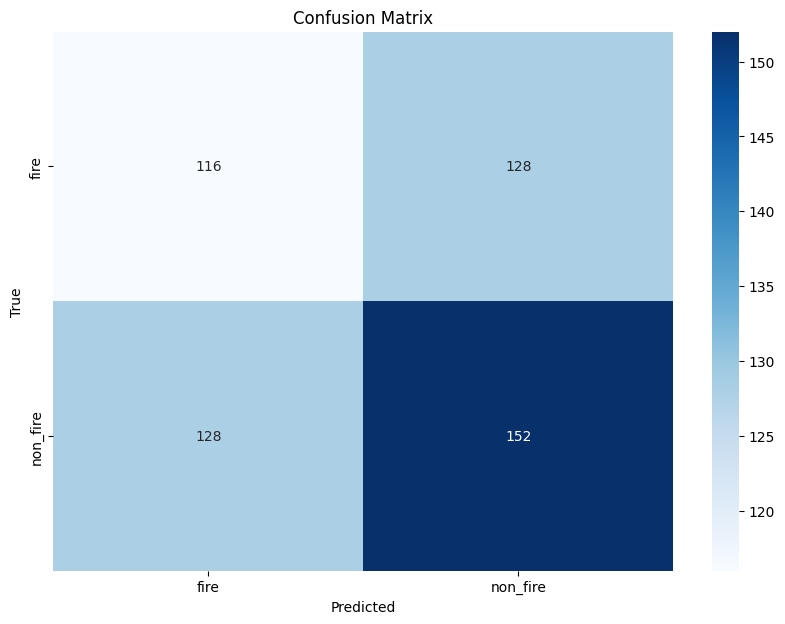

In [13]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix ve Classification Report
test_labels = test_generator.classes
test_predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
test_predictions = np.argmax(test_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(test_labels, test_predictions, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(report)

# Confusion Matrix'i Görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()